In [103]:
import numpy as np
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt

In [104]:
life_df = pd.read_csv('Raw_Life_Expectancy_Data.csv', delimiter=',')

In [105]:
# Remove whitespaces before & after column name and capitalise all column names.
life_df.columns = life_df.columns.str.strip()
life_df.columns = life_df.columns.str.title()
life_df = life_df.convert_dtypes()

In [106]:
life_df.dtypes

Country                             string
Year                                 Int64
Status                              string
Life Expectancy                    Float64
Adult Mortality                      Int64
Infant Deaths                        Int64
Alcohol                            Float64
Percentage Expenditure             Float64
Hepatitis B                          Int64
Measles                              Int64
Bmi                                Float64
Under-Five Deaths                    Int64
Polio                                Int64
Total Expenditure                  Float64
Diphtheria                           Int64
Hiv/Aids                           Float64
Gdp                                Float64
Population                         Float64
Thinness  1-19 Years               Float64
Thinness 5-9 Years                 Float64
Income Composition Of Resources    Float64
Schooling                          Float64
dtype: object

In [107]:
life_df

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,Hiv/Aids,Gdp,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.47,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723,27,4.36,0.0,68,31,...,67,7.13,65,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715,26,4.06,0.0,7,998,...,7,6.52,68,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73,25,4.43,0.0,73,304,...,73,6.53,71,39.8,57.34834,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686,25,1.72,0.0,76,529,...,76,6.16,75,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [108]:
# Total null values amongst each column.
print(life_df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life Expectancy                     10
Adult Mortality                     10
Infant Deaths                        0
Alcohol                            194
Percentage Expenditure               0
Hepatitis B                        553
Measles                              0
Bmi                                 34
Under-Five Deaths                    0
Polio                               19
Total Expenditure                  226
Diphtheria                          19
Hiv/Aids                             0
Gdp                                448
Population                         652
Thinness  1-19 Years                34
Thinness 5-9 Years                  34
Income Composition Of Resources    167
Schooling                          163
dtype: int64


# Total Expenditure Cleaning
By Anthony George 220180567
##### Aim: Complete the Total Expenditure column dataset without applying bias
The cleaning of *Total Expenditure* column data is two-fold. <br>
 1. Zero's missing, causing values of '10' to be values of '1', biasing the data terribly. <br>
 2. Values for *Year = 2015* are missing throughout this dataset column<br>

To correct the 'zero's missing' value error, I will develop an algorithm to add a zero where needed.<br>
To correct the *Year* value error, since the percentage of missing data is low,  we can use the **imputation method** to complete the dataset of this column. 
We do this by taking an average of all *Total Expenditure* values for each *Country* over all other *Years*, and populate the empty field with that value. This way, the missing data can be predicted based on the complete observed data.
The imputation method implies the development of reasonable guesses for missing data.  If the portion of missing data is too high, which in this case it is not, the results lack natural variation that could result in an effective model.

Reference: https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/

**First, let's check which countries have a *Total Expenditure* of greater than zero for the year 2015**

In [109]:
print("\nThe following countries have a Total Expenditure > 0:\n")
print(life_df['Country'].loc[(life_df['Year'] == 2015) & (life_df['Total Expenditure'] > 0)].to_string(index=False))


The following countries have a Total Expenditure > 0:

Afghanistan
    Albania


#### Only two countries!
#### This means that all countries (excluding Afghanistan and Albania) have a Total Expenditure null value for Year = 2015 
Assessing the missing values, we can check the number of unique countries against the number of countries that have a 'Year' column value of '2015'

In [110]:
print("All Unique Countries: ", life_df['Country'].nunique())
print("Countries when Year=2015:", len(life_df.loc[life_df['Year'] == 2015]))

All Unique Countries:  193
Countries when Year=2015: 183


From these results, we can see there are 10 countries that do NOT contain data for the year 2015.
We should check the rest of the data of these countries to assess their validity 

In [111]:
# the first 'Year' entry for each country should be '2015', so let's check that.
country = ''
country_list = []
for index, row in life_df.iterrows():
    if country != row['Country']:
        country = row['Country']
        if row['Year'] == 2015:
            continue
        else:
            country_list.append(row)

print("\nThe following countries do not have data for any 'Year' other than '2013'\n")
df = pd.DataFrame(country_list)
df


The following countries do not have data for any 'Year' other than '2013'



,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,Hiv/Aids,Gdp,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
624,Cook Islands,2013,Developing,<NA>,<NA>,0,0.01,0.000000,98,0,...,98,3.58,98,0.1,<NA>,<NA>,0.1,0.1,<NA>,<NA>
769,Dominica,2013,Developing,<NA>,<NA>,0,0.01,11.419555,96,0,...,96,5.58,96,0.1,722.75665,<NA>,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,<NA>,<NA>,0,0.01,871.878317,8,0,...,79,17.24,79,0.1,3617.752354,<NA>,0.1,0.1,<NA>,0.0
1715,Monaco,2013,Developing,<NA>,<NA>,0,0.01,0.000000,99,0,...,99,4.30,99,0.1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1812,Nauru,2013,Developing,<NA>,<NA>,0,0.01,15.606596,87,0,...,87,4.65,87,0.1,136.18321,<NA>,0.1,0.1,<NA>,9.6
1909,Niue,2013,Developing,<NA>,<NA>,0,0.01,0.000000,99,0,...,99,7.20,99,0.1,<NA>,<NA>,0.1,0.1,<NA>,<NA>
1958,Palau,2013,Developing,<NA>,<NA>,0,<NA>,344.690631,99,0,...,99,9.27,99,0.1,1932.12237,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,<NA>,<NA>,0,8.54,0.000000,97,0,...,96,6.14,96,0.1,<NA>,<NA>,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,<NA>,<NA>,0,0.01,0.000000,69,0,...,69,6.50,69,0.1,<NA>,<NA>,<NA>,<NA>,<NA>,15.1
2713,Tuvalu,2013,Developing,<NA>,<NA>,0,0.01,78.281203,9,0,...,9,16.61,9,0.1,3542.13589,1819.0,0.2,0.1,<NA>,0.0


As we can see above, these 10 countries have some data populated for the *Year* 2013 only, with the zero data *Life Expectancy*. Since this column is crucial to the remainder of our analysis, **the removal of these entries from the dataset merits justification.**

In [112]:
# Drop the above rows from the dataset
for index, row in df.iterrows():
    life_df.drop(index, inplace=True)

life_df

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,Hiv/Aids,Gdp,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.47,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723,27,4.36,0.0,68,31,...,67,7.13,65,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715,26,4.06,0.0,7,998,...,7,6.52,68,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73,25,4.43,0.0,73,304,...,73,6.53,71,39.8,57.34834,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686,25,1.72,0.0,76,529,...,76,6.16,75,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


**Now we have a slightly cleaner dataset, we can check the exact number of rows we need to update with our coming algorithm**

In [113]:
print('Number of rows that require updating:', 
      len(life_df.loc[(life_df['Year'] == 2015) & (life_df['Total Expenditure'].isnull())]),'\n') 

print(life_df[['Country', 'Year', 'Total Expenditure']].loc
      [
    (life_df['Year'] == 2015) & 
    (life_df['Total Expenditure'].isnull())
      ])

Number of rows that require updating: 181 

                                 Country  Year  Total Expenditure
32                               Algeria  2015               <NA>
48                                Angola  2015               <NA>
64                   Antigua and Barbuda  2015               <NA>
80                             Argentina  2015               <NA>
96                               Armenia  2015               <NA>
...                                  ...   ...                ...
2858  Venezuela (Bolivarian Republic of)  2015               <NA>
2874                            Viet Nam  2015               <NA>
2890                               Yemen  2015               <NA>
2906                              Zambia  2015               <NA>
2922                            Zimbabwe  2015               <NA>

[181 rows x 3 columns]


**Algorithm to find and correct 'missing zeros' values that should be ten's, but are one's**

In [114]:
print('\nCompensated values:\n')
ctry = ''
for index, row in life_df.iterrows():
    if country != '' and pd.notnull(row['Total Expenditure']):
        if ctry != row['Country']:
            ctry = row['Country']
            flag = False
        if row['Total Expenditure'] > 9 and flag == False:
            for i in life_df.index:
                if life_df['Country'][i] == ctry:
                    flag = True
                    if pd.notnull(life_df['Total Expenditure'][i]):
                        row = str(life_df['Total Expenditure'][i])
                        num, dec = row.split('.')
                        if int(num) == 1:
                            num = num[:1] + '0' + num[1:]
                            num = num + '.' + dec
                            num = float(num)
                            
                            # update Total Expenditure column with updated values
                            life_df['Total Expenditure'][i] = num
                            print(i, ctry, life_df['Total Expenditure'][i])



Compensated values:

132 Austria 10.94
135 Austria 10.6
136 Austria 10.4
137 Austria 10.35
138 Austria 10.53
139 Austria 10.56
140 Austria 10.48
141 Austria 10.27
142 Austria 10.12
143 Austria 10.6
241 Belgium 10.59
242 Belgium 10.57
243 Belgium 10.54
244 Belgium 10.42
245 Belgium 10.17
246 Belgium 10.39
424 Burundi 10.3
497 Canada 10.45
498 Canada 10.67
499 Canada 10.78
500 Canada 10.82
503 Canada 10.3
661 Cuba 10.6
662 Cuba 10.19
664 Cuba 10.79
665 Cuba 10.42
738 Denmark 10.8
740 Denmark 10.98
741 Denmark 10.87
744 Denmark 10.18
754 Djibouti 10.57
937 France 10.57
938 France 10.45
939 France 10.53
940 France 10.6
941 France 10.53
942 France 10.43
943 France 10.22
983 Georgia 10.5
984 Georgia 10.19
997 Germany 10.99
998 Germany 10.93
1001 Germany 10.39
1002 Germany 10.18
1003 Germany 10.34
1004 Germany 10.52
1005 Germany 10.37
1006 Germany 10.62
1007 Germany 10.4
1008 Germany 10.15
1009 Germany 10.1
1126 Haiti 10.41
1182 Iceland 10.7
1315 Japan 10.23
1316 Japan 10.25
1317 Japan 10.17

**Now that we have the correct values in place, aggregation can be done to calculate a value to populate the *Total Expenditure* field of each *Country* for *Year* == 2015**

In [115]:
print('Average of all ')
country = ''
total = []
percentages = {}
for index, row in life_df.iterrows():
    if country != row['Country']:
        if country != '' and len(total)>0:
            average = mean(total)
            percentages[country] = round(average, 2)
        country = row['Country']
        total = []
    if row['Year'] == 2015:
        continue
    else:
        if pd.notnull(row['Total Expenditure']):
            total.append(row['Total Expenditure'])
    if index == life_df.index[-1]:
        average = mean(total)
        percentages[country] = round(average, 2)

for i in percentages:
    print(i, percentages[i])

Average of all 
Afghanistan 8.26
Albania 5.94
Algeria 4.6
Angola 3.92
Antigua and Barbuda 4.79
Argentina 6.91
Armenia 4.86
Australia 8.84
Austria 10.72
Azerbaijan 5.68
Bahamas 6.71
Bahrain 3.81
Bangladesh 2.85
Barbados 6.12
Belarus 6.19
Belgium 9.56
Belize 5.04
Benin 4.64
Bhutan 5.35
Bolivia (Plurinational State of) 5.63
Bosnia and Herzegovina 8.74
Botswana 5.51
Brazil 8.02
Brunei Darussalam 2.82
Bulgaria 7.24
Burkina Faso 6.04
Burundi 7.69
Côte d'Ivoire 5.72
Cabo Verde 4.76
Cambodia 5.74
Cameroon 4.72
Canada 10.05
Central African Republic 4.04
Chad 4.38
Chile 6.91
China 4.92
Colombia 6.34
Comoros 4.83
Congo 2.99
Costa Rica 8.62
Croatia 7.37
Cuba 8.83
Cyprus 6.76
Czechia 7.05
Democratic Republic of the Congo 3.56
Denmark 10.22
Djibouti 7.67
Dominican Republic 4.68
Ecuador 5.88
Egypt 5.35
El Salvador 7.1
Equatorial Guinea 2.93
Eritrea 3.47
Estonia 5.69
Ethiopia 4.9
Fiji 3.9
Finland 8.61
France 10.76
Gabon 3.18
Gambia 5.31
Georgia 8.53
Germany 10.67
Ghana 4.33
Greece 9.04
Grenada 6.19
Gu

Comparing the result of the aggregation with known results, we see that this imputation to derive the missing values for this column is actually quite accurate.<br><br>
We can see the aggregation has calculated Afghanistan has a Total Percentage for Year 2015 of 8.26 <br>
Compared with Afghanistan's actual Total Percentage for Year 2015 is 8.16 <br>
Similarly, Albania's actual = 6.0 vs the calcualted 5.94 <br>
Pretty accurate!<br>
Let's update the dataset

In [116]:
for i in percentages:     
    life_df.loc[(life_df['Country'] == i) & (life_df['Year'] == 2015), 'Total Expenditure'] = percentages[i]
    #print(life_df.loc[(life_df['Country'] == i) & (life_df['Year'] == 2015)])
life_df.loc[life_df['Year'] == 2015]

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,Hiv/Aids,Gdp,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.26,65,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74,0,4.6,364.975229,99,0,...,99,5.94,99,0.1,3954.22783,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19,21,<NA>,0.0,95,63,...,95,4.6,95,0.1,4132.76292,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335,66,<NA>,0.0,64,118,...,7,3.92,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13,0,<NA>,0.0,99,0,...,86,4.79,99,0.2,13566.9541,<NA>,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157,9,<NA>,0.0,87,0,...,87,5.0,87,0.1,<NA>,<NA>,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127,28,<NA>,0.0,97,256,...,97,5.98,97,0.1,<NA>,<NA>,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224,37,<NA>,0.0,69,468,...,63,5.01,69,0.1,<NA>,<NA>,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33,27,<NA>,0.0,9,9,...,9,5.82,9,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [117]:
# If all null are dropped.
#clean_df = life_df.dropna()

In [118]:
# 2015 percentage exp. 
# unique country names.

# Alcohol Cleaning
By Hooman Shykhipour 220060109
##### Aim: Complete the Alcohol column dataset (N/A removal)
Values for *Year = 2015* are missing throughout this dataset column<br>

In [119]:
print("\nThese countries have Alcohol consumption values in 2015 (not N/A):\n")
print(life_df['Country'].loc[(life_df['Year'] == 2015) & (life_df['Alcohol'] > 0)].to_string(index=False))


These countries have Alcohol consumption values in 2015 (not N/A):

                                       Afghanistan
                                           Albania
                                       New Zealand
                                            Norway
                                         Singapore
United Kingdom of Great Britain and Northern Ir...


In [120]:
#find the average of alcohol consumption for each country

country = ''
total = []
averageAlcohol = {}
for index, row in life_df.iterrows():
    if country != row['Country']:
        if country != '' and len(total)>0:
            average = mean(total)
            averageAlcohol[country] = round(average, 2)
        country = row['Country']
        total = []
    if row['Year'] == 2015:
        continue
    else:
        if pd.notnull(row['Alcohol']):
            total.append(row['Alcohol'])
    if index == life_df.index[-1]:
        average = mean(total)
        averageAlcohol[country] = round(average, 2)
for i in averageAlcohol:
    print(i, averageAlcohol[i])

Afghanistan 0.01
Albania 4.87
Algeria 0.41
Angola 5.74
Antigua and Barbuda 7.95
Argentina 7.97
Armenia 3.7
Australia 10.16
Austria 12.24
Azerbaijan 0.99
Bahamas 10.27
Bahrain 1.93
Bangladesh 0.01
Barbados 8.21
Belarus 13.5
Belgium 11.04
Belize 6.25
Benin 1.0
Bhutan 0.28
Bolivia (Plurinational State of) 3.21
Bosnia and Herzegovina 4.41
Botswana 4.67
Brazil 7.21
Brunei Darussalam 0.38
Bulgaria 10.87
Burkina Faso 4.24
Burundi 4.1
Côte d'Ivoire 2.84
Cabo Verde 3.45
Cambodia 1.49
Cameroon 4.14
Canada 8.05
Central African Republic 1.23
Chad 0.41
Chile 6.98
China 4.18
Colombia 4.42
Comoros 0.13
Congo 2.17
Costa Rica 3.92
Croatia 12.45
Cuba 4.19
Cyprus 10.26
Czechia 13.03
Democratic People's Republic of Korea 3.0
Democratic Republic of the Congo 1.42
Denmark 10.71
Djibouti 0.76
Dominican Republic 6.03
Ecuador 3.81
Egypt 0.19
El Salvador 2.69
Equatorial Guinea 7.34
Eritrea 0.61
Estonia 9.01
Ethiopia 1.07
Fiji 1.46
Finland 9.55
France 12.4
Gabon 7.88
Gambia 2.13
Georgia 5.62
Germany 11.63
Ghana 

In [121]:
# insert average of alcohol consumption for year 2015 which are N/A
for i in averageAlcohol:
    life_df.loc[(life_df['Country'] == i) & (life_df['Year'] == 2015) , 'Alcohol'] = averageAlcohol[i]
# Montenegro does not have alcohol consumption for year 2005, below line insert avarage of Montengro for 2005
    life_df.loc[(life_df['Country'] == 'Montenegro') & (life_df['Year'] == 2005) , 'Alcohol'] = averageAlcohol[i]

life_df.loc[life_df['Year'] == 2015]

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,Hiv/Aids,Gdp,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.26,65,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74,0,4.87,364.975229,99,0,...,99,5.94,99,0.1,3954.22783,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19,21,0.41,0.0,95,63,...,95,4.6,95,0.1,4132.76292,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335,66,5.74,0.0,64,118,...,7,3.92,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13,0,7.95,0.0,99,0,...,86,4.79,99,0.2,13566.9541,<NA>,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157,9,7.42,0.0,87,0,...,87,5.0,87,0.1,<NA>,<NA>,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127,28,3.09,0.0,97,256,...,97,5.98,97,0.1,<NA>,<NA>,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224,37,0.05,0.0,69,468,...,63,5.01,69,0.1,<NA>,<NA>,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33,27,2.24,0.0,9,9,...,9,5.82,9,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [122]:
print(life_df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life Expectancy                      0
Adult Mortality                      0
Infant Deaths                        0
Alcohol                             16
Percentage Expenditure               0
Hepatitis B                        553
Measles                              0
Bmi                                 32
Under-Five Deaths                    0
Polio                               19
Total Expenditure                   47
Diphtheria                          19
Hiv/Aids                             0
Gdp                                443
Population                         644
Thinness  1-19 Years                32
Thinness 5-9 Years                  32
Income Composition Of Resources    160
Schooling                          160
dtype: int64


## Result:
Missing values for alcohol consuption reduced to 16 (initially was 194). These 16 missing values are all for **South Sudan** which does not have any alcohol consumption data for any year.<br>

     


# Adult Mortality Cleaning
By Hooman Shykhipour 220060109
##### Aim: Complete the Adult Mortality column dataset (add zeros)
Values for *Adult Mortality* have missing zeros throughout this dataset column<br>
First I will calcualte mortality mean for all countries, then I will check if any value length is lower than mean length, I will pad zeros accordingly<br>

In [123]:
#save the dataframe before cleaning, so I can compare it with new dataframe after cleaning
before_Adult_Mortality_cleaning= life_df.copy()

In [124]:
#find the average of Adult Mortality for each country

country = ''
total = []
averageAdultMortality = {}
for index, row in life_df.iterrows():
    if country != row['Country']:
        if country != '' and len(total)>0:
            average = mean(total)
            averageAdultMortality[country] = int(average)
        country = row['Country']
        total = []
    total.append(row['Adult Mortality'])
    if index == life_df.index[-1]:
        average = mean(total)
        averageAdultMortality[country] = int(average)
for i in averageAdultMortality:
    print(i, averageAdultMortality[i])

Afghanistan 269
Albania 45
Algeria 108
Angola 328
Antigua and Barbuda 127
Argentina 106
Armenia 117
Australia 63
Austria 65
Azerbaijan 115
Bahamas 152
Bahrain 65
Bangladesh 141
Barbados 77
Belarus 218
Belgium 70
Belize 155
Benin 269
Bhutan 230
Bolivia (Plurinational State of) 177
Bosnia and Herzegovina 64
Botswana 448
Brazil 150
Brunei Darussalam 67
Bulgaria 125
Burkina Faso 252
Burundi 291
Côte d'Ivoire 417
Cabo Verde 116
Cambodia 196
Cameroon 294
Canada 64
Central African Republic 333
Chad 227
Chile 63
China 73
Colombia 124
Comoros 240
Congo 322
Costa Rica 69
Croatia 89
Cuba 57
Cyprus 54
Czechia 71
Democratic People's Republic of Korea 160
Democratic Republic of the Congo 265
Denmark 66
Djibouti 274
Dominican Republic 143
Ecuador 132
Egypt 170
El Salvador 155
Equatorial Guinea 279
Eritrea 308
Estonia 169
Ethiopia 285
Fiji 125
Finland 68
France 73
Gabon 220
Gambia 249
Georgia 114
Germany 71
Ghana 180
Greece 73
Grenada 153
Guatemala 131
Guinea 259
Guinea-Bissau 158
Guyana 203
Haiti 168

In [125]:
# add zeros to right side of Adult Mortality
for index, row in life_df.iterrows():
  
    while((len(str(life_df.at[index, 'Adult Mortality']))< len(str(averageAdultMortality[row['Country']])))):
        life_df.at[index, 'Adult Mortality'] = 10*life_df.at[index, 'Adult Mortality']
            
        


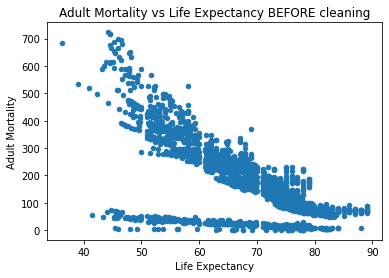

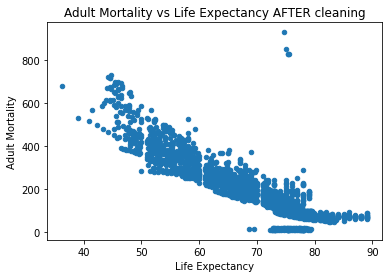

In [126]:
ax2 = before_Adult_Mortality_cleaning.plot.scatter(x='Life Expectancy', y='Adult Mortality',title='Adult Mortality vs Life Expectancy BEFORE cleaning')
ax1 = life_df.plot.scatter(x='Life Expectancy', y='Adult Mortality',title='Adult Mortality vs Life Expectancy AFTER cleaning')

## Result:
As can be seen from above scatter plots,many Adult Mortality outliers are rectified,and new values match the overal adult mortality for each country.<br>

     

# Polio, Diphtheria & Hepatitis B Cleaning
By Sarah Gosling 220094149

#### Aim: Complete cleansing the Polio, Diptheria & Hepatitis B column dataset without applying bias

There are two issues with the data in these columns, missing values and single integer outliers. I identified this by graphing the data in scatter plots, making it very clear there were quite a few single digit outliers. To remedy these issues I filled the null values using Pandas interpolate(linear) method which fills the entries with like data. I then found all the single digit entries, set them to NaN and then used interpolate(linear) to fill these with like data.

#### First Step: Filling nulls for each column and plot results showing the single digit outliers.

List of columns and their null count


Country                              0
Year                                 0
Status                               0
Life Expectancy                      0
Adult Mortality                      0
Infant Deaths                        0
Alcohol                             16
Percentage Expenditure               0
Hepatitis B                          0
Measles                              0
Bmi                                 32
Under-Five Deaths                    0
Polio                                0
Total Expenditure                   47
Diphtheria                           0
Hiv/Aids                             0
Gdp                                443
Population                         644
Thinness  1-19 Years                32
Thinness 5-9 Years                  32
Income Composition Of Resources    160
Schooling                          160
dtype: int64


Scatterplots showing single digit outliers.


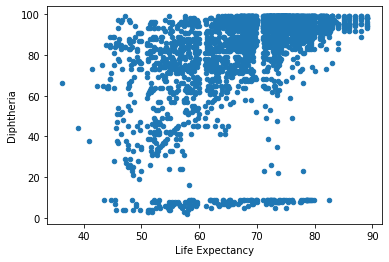

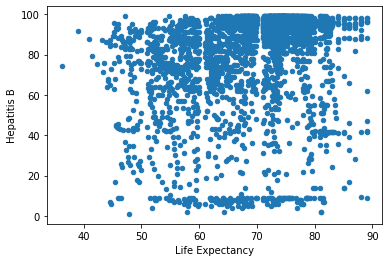

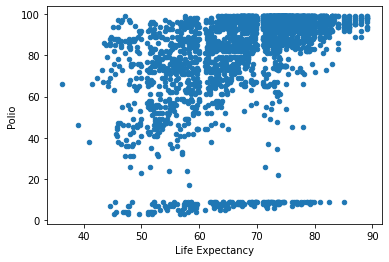

In [127]:
# Convert types to float to be able to use interpolate() function.
life_df['Diphtheria'] = life_df['Diphtheria'].astype(float)
life_df['Hepatitis B'] = life_df['Hepatitis B'].astype(float)
life_df['Polio'] = life_df['Polio'].astype(float)
life_df['Life Expectancy'] = life_df['Life Expectancy'].astype(float)

# Use interpolate function to fill in NaN entries with like data.
life_df['Life Expectancy'] = life_df['Life Expectancy'].interpolate(method ='linear', limit_direction='forward', axis=0)
life_df['Diphtheria'] = life_df['Diphtheria'].interpolate(method ='linear', limit_direction='forward', axis=0)
life_df['Hepatitis B'] = life_df['Hepatitis B'].interpolate(method ='linear', limit_direction='forward', axis=0)
life_df['Polio'] = life_df['Polio'].interpolate(method ='linear', limit_direction='forward', axis=0)

print("List of columns and their null count")
print("\n")
print(life_df.isnull().sum())
print("\n")
print("Scatterplots showing single digit outliers.")

# Scatterplots showing the single digit outliers for each column.
ax = life_df.plot.scatter(x='Life Expectancy', y='Diphtheria')
ax = life_df.plot.scatter(x='Life Expectancy', y='Hepatitis B')
ax = life_df.plot.scatter(x='Life Expectancy', y='Polio')

#### Second Step: Editing the single digit outliers to be similar to like entries.

List of columns and their null count


Country                              0
Year                                 0
Status                               0
Life Expectancy                      0
Adult Mortality                      0
Infant Deaths                        0
Alcohol                             16
Percentage Expenditure               0
Hepatitis B                          0
Measles                              0
Bmi                                 32
Under-Five Deaths                    0
Polio                                0
Total Expenditure                   47
Diphtheria                           0
Hiv/Aids                             0
Gdp                                443
Population                         644
Thinness  1-19 Years                32
Thinness 5-9 Years                  32
Income Composition Of Resources    160
Schooling                          160
dtype: int64


Scatterplots showing rectified outliers.


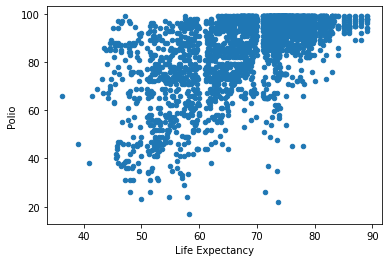

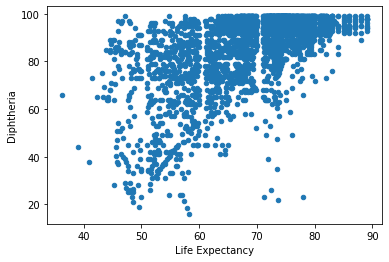

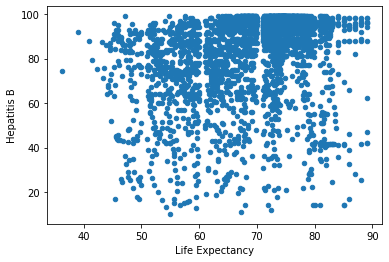

In [128]:
# Change the type to string.
life_df['Polio'] = life_df['Polio'].astype(str)
life_df['Diphtheria'] = life_df['Diphtheria'].astype(str)
life_df['Hepatitis B'] = life_df['Hepatitis B'].astype(str)

# Go through and find the single digit entries and change them to NaN.
for value in life_df['Polio']:
    value = str(value)
    if (len(value) == 3):
        life_df.loc[life_df['Polio'] == value, 'Polio'] = np.NaN
        
for value in life_df['Diphtheria']:
    value = str(value)
    if (len(value) == 3):
        life_df.loc[life_df['Diphtheria'] == value, 'Diphtheria'] = np.NaN
        
for value in life_df['Hepatitis B']:
    value = str(value)
    if (len(value) == 3):
        life_df.loc[life_df['Hepatitis B'] == value, 'Hepatitis B'] = np.NaN
    
# Change data type back to float.
life_df['Polio'] = life_df['Polio'].astype(float)
life_df['Diphtheria'] = life_df['Diphtheria'].astype(float)
life_df['Hepatitis B'] = life_df['Hepatitis B'].astype(float)

# Use interpolate() function to fill the NaN entries with like data. Direction forwards/backwards to get 1st and last entries.
life_df['Polio'] = life_df['Polio'].interpolate(method ='linear', limit_direction='forward', axis=0)
life_df['Polio'] = life_df['Polio'].interpolate(method ='linear', limit_direction='backward', axis=0)

life_df['Diphtheria'] = life_df['Diphtheria'].interpolate(method ='linear', limit_direction='forward', axis=0)
life_df['Diphtheria'] = life_df['Diphtheria'].interpolate(method ='linear', limit_direction='backward', axis=0)

life_df['Hepatitis B'] = life_df['Hepatitis B'].interpolate(method ='linear', limit_direction='forward', axis=0)
life_df['Hepatitis B'] = life_df['Hepatitis B'].interpolate(method ='linear', limit_direction='backward', axis=0)

print("List of columns and their null count")
print("\n")
print(life_df.isnull().sum())
print("\n")
print("Scatterplots showing rectified outliers.")

# Plot the results of cleaned columns.
ax = life_df.plot.scatter(x='Life Expectancy', y='Polio')
ax = life_df.plot.scatter(x='Life Expectancy', y='Diphtheria')
ax = life_df.plot.scatter(x='Life Expectancy', y='Hepatitis B')